In [1]:
# load packages
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn import decomposition, ensemble
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas, xgboost, numpy, textblob, string
import pandas as pd

In [2]:
# load the dataset
trainDF = pd.read_csv('../input/bbc-text.csv') # encoding = "latin" 

In [3]:
trainDF.head(10)        

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [4]:
trainDF.shape


(2225, 2)

In [5]:
n_classes = trainDF.shape[1]
print(n_classes)

2


In [6]:
trainDF['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [7]:
trainDF['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

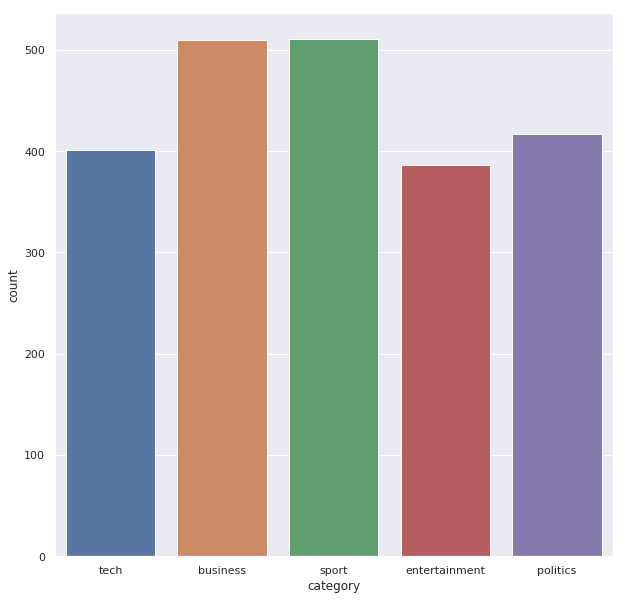

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(trainDF['category'])

## Data preparation

In [9]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['category'])

train_labels = train_y
valid_labels = valid_y
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

## Feature Extraction

### Count Vectors

In [10]:
# Count Vectors as features
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

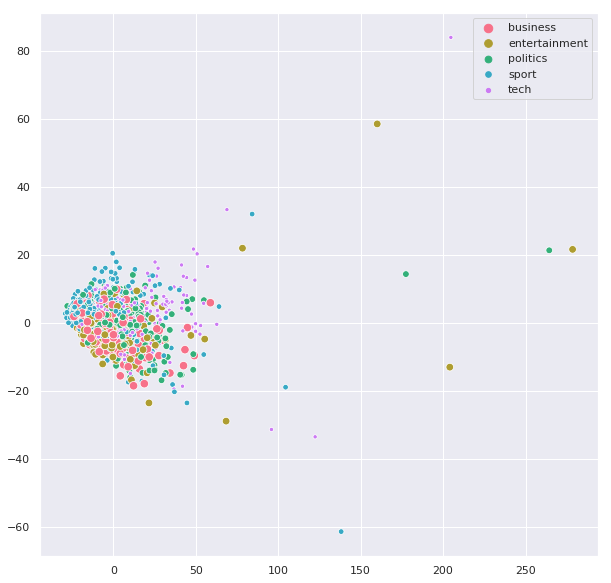

In [11]:
# plot the train features
pca = PCA(n_components=2).fit(xtrain_count.toarray())
data2D = pca.transform(xtrain_count.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=train_labels.tolist(),size=train_labels.tolist(),palette="husl")

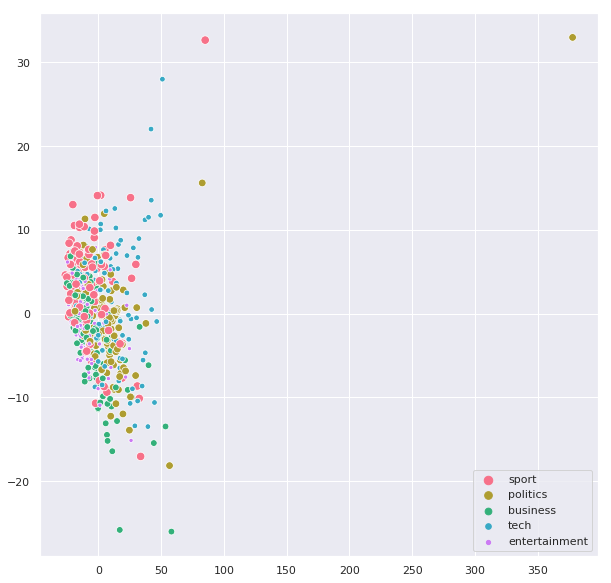

In [12]:
# plot the validation features
pca = PCA(n_components=2).fit(xvalid_count.toarray())
data2D = pca.transform(xvalid_count.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=valid_labels.tolist(),size=valid_labels.tolist(),palette="husl")

###  TF-IDF Vectors

 TF-IDF Vectors as features
 
 a. Word Level TF-IDF : Matrix representing tf-idf scores of every term in different documents
 
 b. N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf scores  of N-grams
 
 c. Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams in the corpus

### word level tf-idf

In [13]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

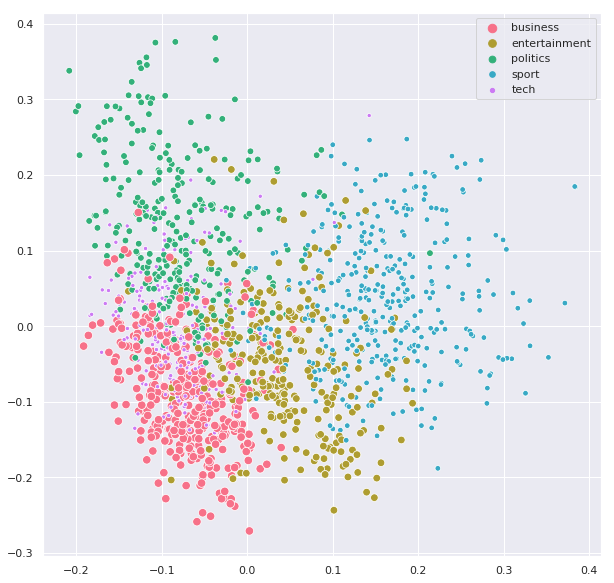

In [14]:
# plot the train features
pca = PCA(n_components=2).fit(xtrain_tfidf.toarray())
data2D = pca.transform(xtrain_tfidf.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=train_labels.tolist(),size=train_labels.tolist(),palette="husl")

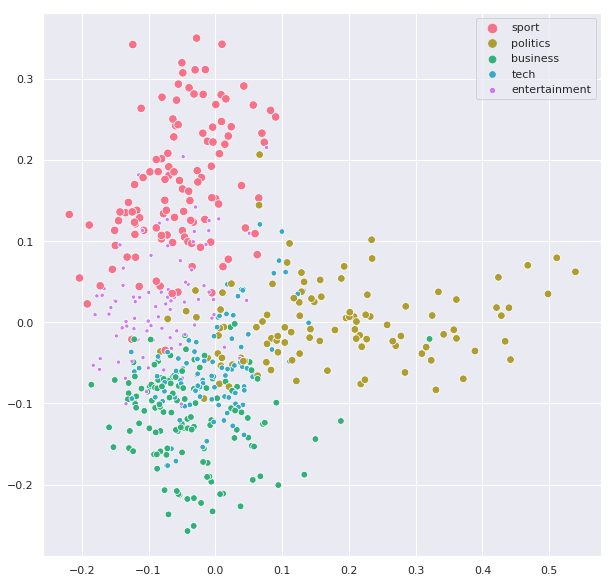

In [15]:
# plot the validation features
pca = PCA(n_components=2).fit(xvalid_tfidf.toarray())
data2D = pca.transform(xvalid_tfidf.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=valid_labels.tolist(),size=valid_labels.tolist(),palette="husl")

### ngram level tf-idf 

In [16]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

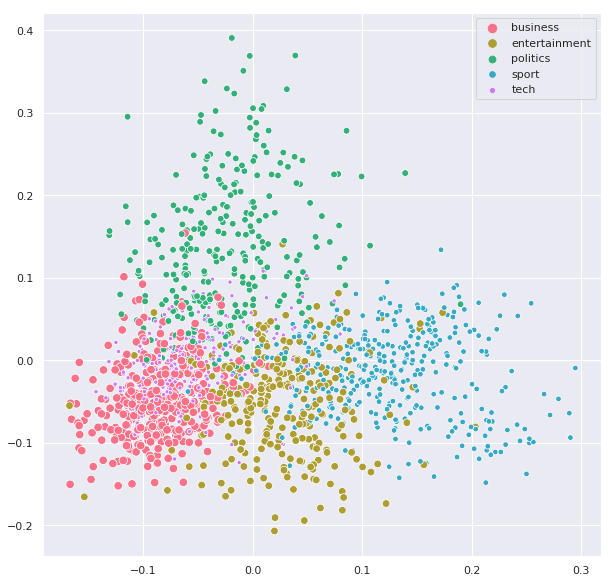

In [17]:
# plot the train features
pca = PCA(n_components=2).fit(xtrain_tfidf_ngram.toarray())
data2D = pca.transform(xtrain_tfidf_ngram.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=train_labels.tolist(),size=train_labels.tolist(),palette="husl")

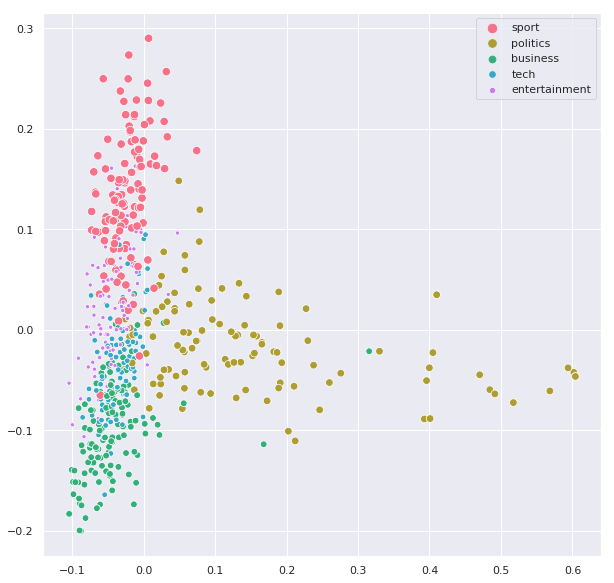

In [18]:
# plot the validation features
pca = PCA(n_components=2).fit(xvalid_tfidf_ngram.toarray())
data2D = pca.transform(xvalid_tfidf_ngram.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=valid_labels.tolist(),size=valid_labels.tolist(),palette="husl")

### characters level tf-idf

In [19]:
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDF['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

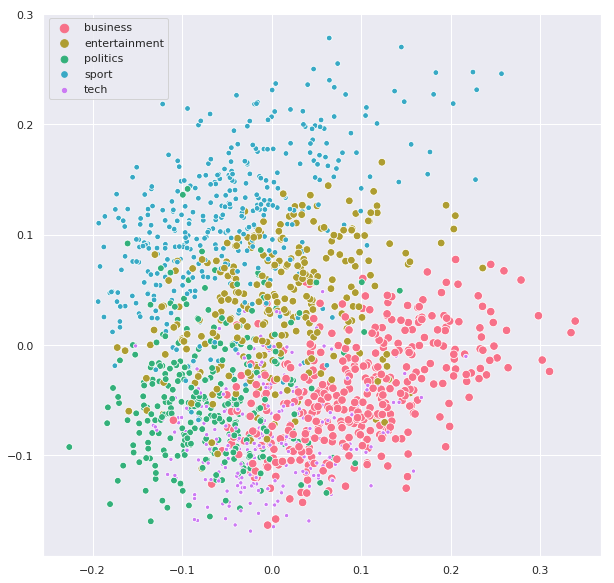

In [20]:
# plot the train features
pca = PCA(n_components=2).fit(xtrain_tfidf_ngram_chars.toarray())
data2D = pca.transform(xtrain_tfidf_ngram_chars.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=train_labels.tolist(),size=train_labels.tolist(),palette="husl")

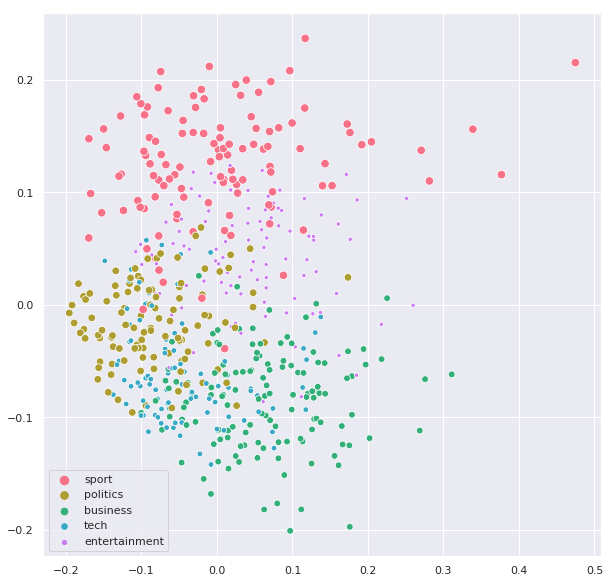

In [21]:
# plot the validation features
pca = PCA(n_components=2).fit(xvalid_tfidf_ngram_chars.toarray())
data2D = pca.transform(xvalid_tfidf_ngram_chars.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=valid_labels.tolist(),size=valid_labels.tolist(),palette="husl")

### HashingVectorizer

In [22]:
# getting train features
hash_vectorizer = HashingVectorizer(n_features=5000)
hash_vectorizer.fit(trainDF['text'])
xtrain_hash_vectorizer =  hash_vectorizer.transform(train_x) 
xvalid_hash_vectorizer =  hash_vectorizer.transform(valid_x)

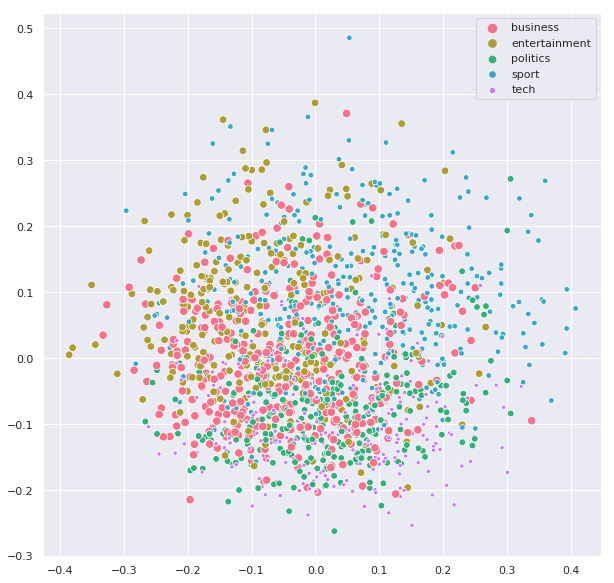

In [23]:
# plot the train features
pca = PCA(n_components=2).fit(xtrain_hash_vectorizer.toarray())
data2D = pca.transform(xtrain_hash_vectorizer.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=train_labels.tolist(),size=train_labels.tolist(),palette="husl")

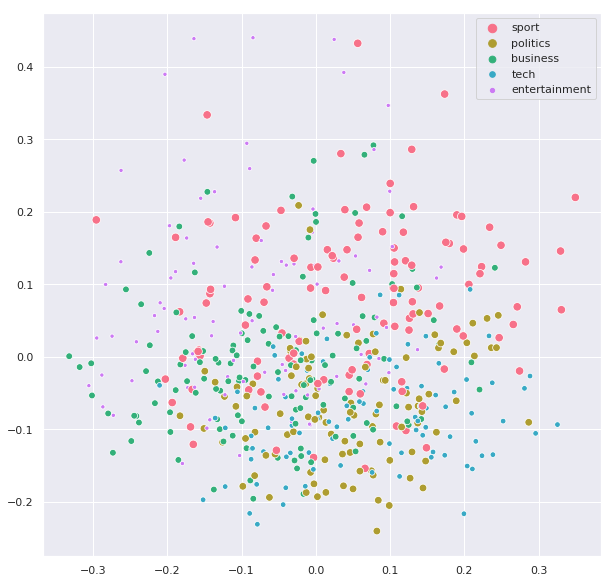

In [24]:
# plot the validation features
pca = PCA(n_components=2).fit(xvalid_hash_vectorizer.toarray())
data2D = pca.transform(xvalid_hash_vectorizer.toarray())
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data2D[:,0], data2D[:,1],
hue=valid_labels.tolist(),size=valid_labels.tolist(),palette="husl")

## Model Building

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# roc curve for models

#fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
#random_probs = [0 for i in range(len(y_test))]

def train_model(classifier, feature_vector_train, label, feature_vector_valid,is_neural_net=False):

    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    p_fpr, p_tpr, _ = roc_curve(valid_y, predictions, pos_label=1)
    cm = confusion_matrix(valid_y,predictions)
    
    
    plt.plot(p_tpr,p_fpr)
    plt.xlabel('TPR')
    plt.ylabel('FPR')
    plt.title("")
    #print(cm)
    
    
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print(classification_report(valid_y, predictions))
    
    
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
        

   
    
    return metrics.accuracy_score(predictions, valid_y)

### Naive Bayes

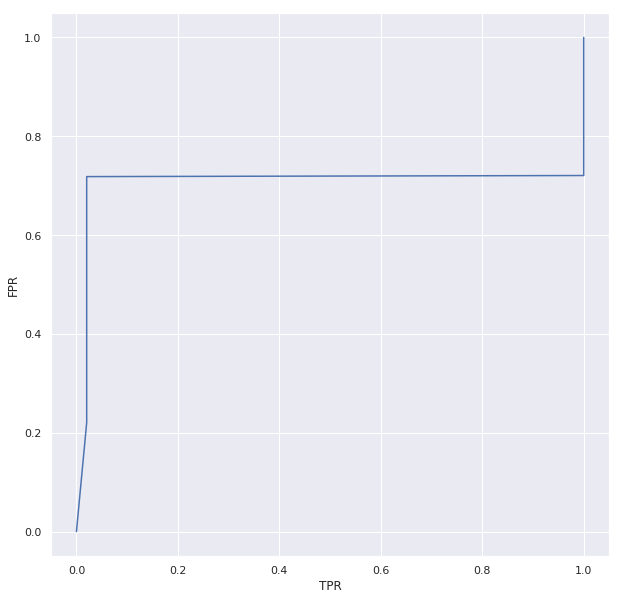

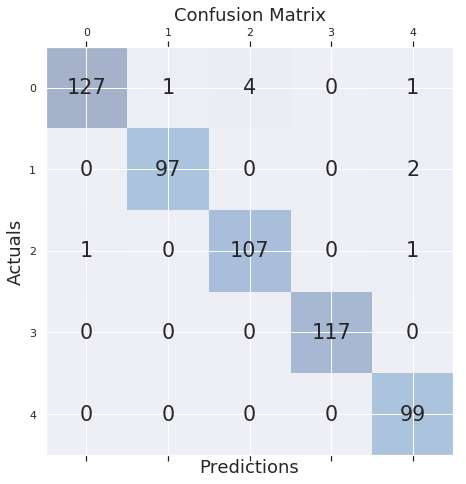

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       133
           1       0.99      0.98      0.98        99
           2       0.96      0.98      0.97       109
           3       1.00      1.00      1.00       117
           4       0.96      1.00      0.98        99

    accuracy                           0.98       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.98      0.98      0.98       557

NB, Count Vectors:  0.9820466786355476


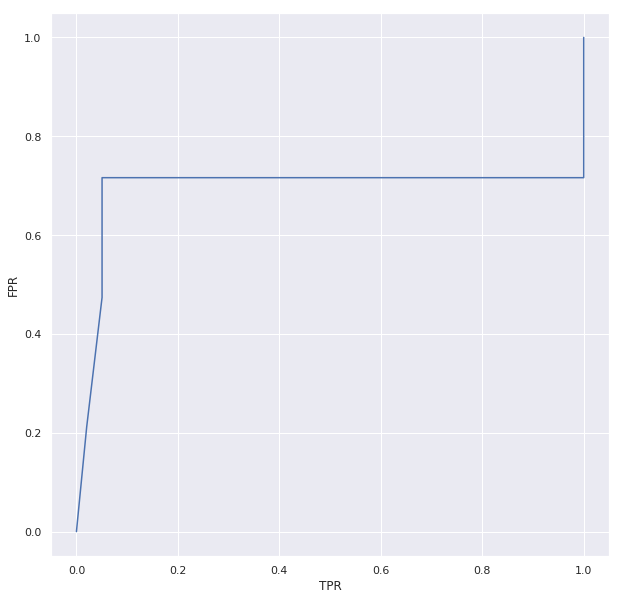

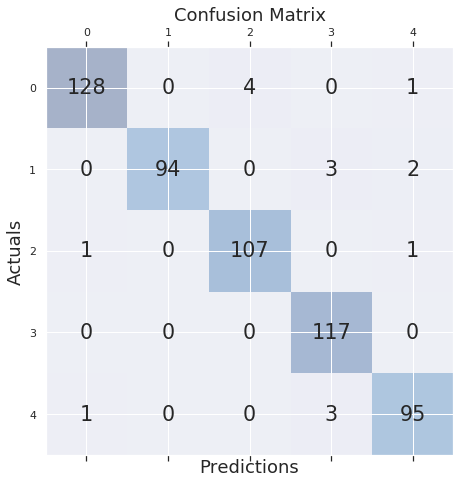

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       133
           1       1.00      0.95      0.97        99
           2       0.96      0.98      0.97       109
           3       0.95      1.00      0.97       117
           4       0.96      0.96      0.96        99

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557

NB, WordLevel TF-IDF:  0.9712746858168761


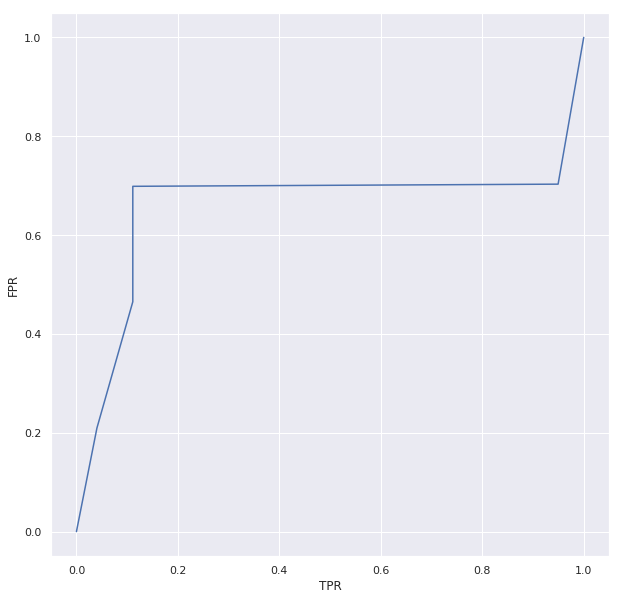

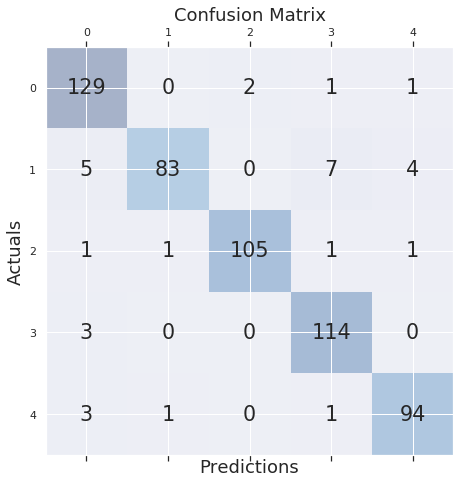

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       133
           1       0.98      0.84      0.90        99
           2       0.98      0.96      0.97       109
           3       0.92      0.97      0.95       117
           4       0.94      0.95      0.94        99

    accuracy                           0.94       557
   macro avg       0.95      0.94      0.94       557
weighted avg       0.94      0.94      0.94       557

NB, N-Gram Vectors:  0.9425493716337523


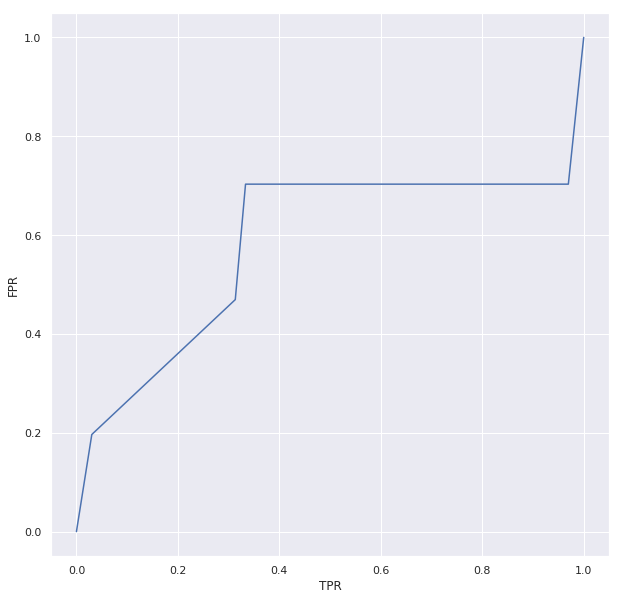

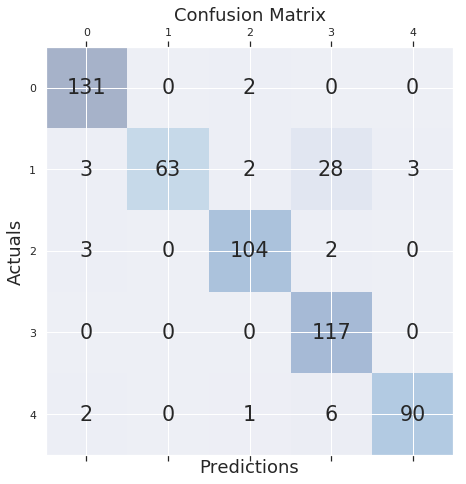

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       133
           1       1.00      0.64      0.78        99
           2       0.95      0.95      0.95       109
           3       0.76      1.00      0.87       117
           4       0.97      0.91      0.94        99

    accuracy                           0.91       557
   macro avg       0.93      0.90      0.90       557
weighted avg       0.92      0.91      0.90       557

NB, CharLevel Vectors:  0.9066427289048474


In [26]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y,xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y,xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

### Linear Classifier

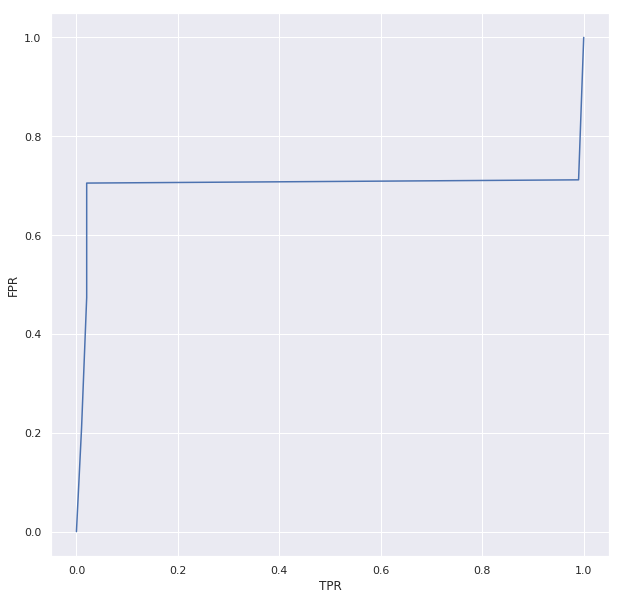

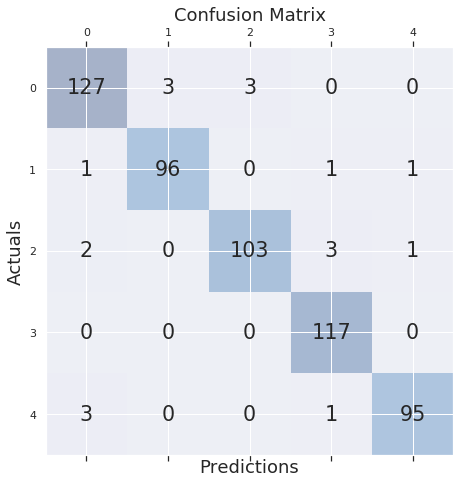

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       133
           1       0.97      0.97      0.97        99
           2       0.97      0.94      0.96       109
           3       0.96      1.00      0.98       117
           4       0.98      0.96      0.97        99

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557

LR, Count Vectors:  0.9658886894075404


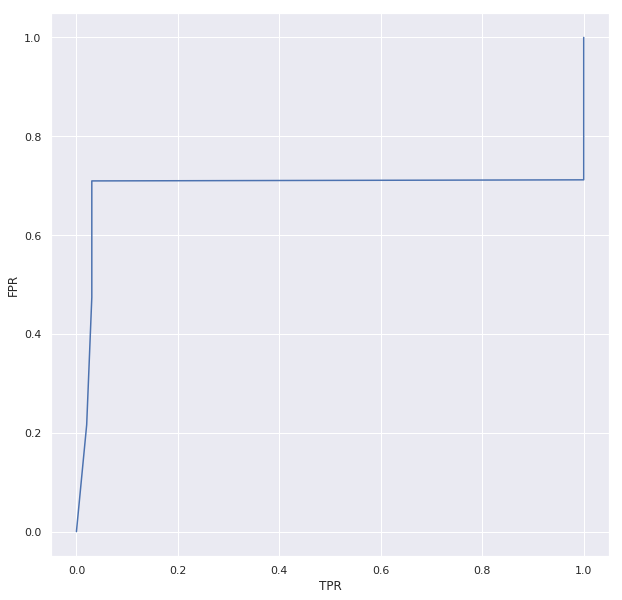

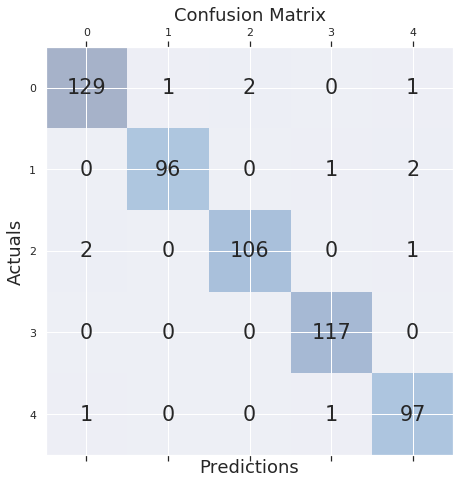

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       133
           1       0.99      0.97      0.98        99
           2       0.98      0.97      0.98       109
           3       0.98      1.00      0.99       117
           4       0.96      0.98      0.97        99

    accuracy                           0.98       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.98      0.98      0.98       557

LR, WordLevel TF-IDF:  0.9784560143626571


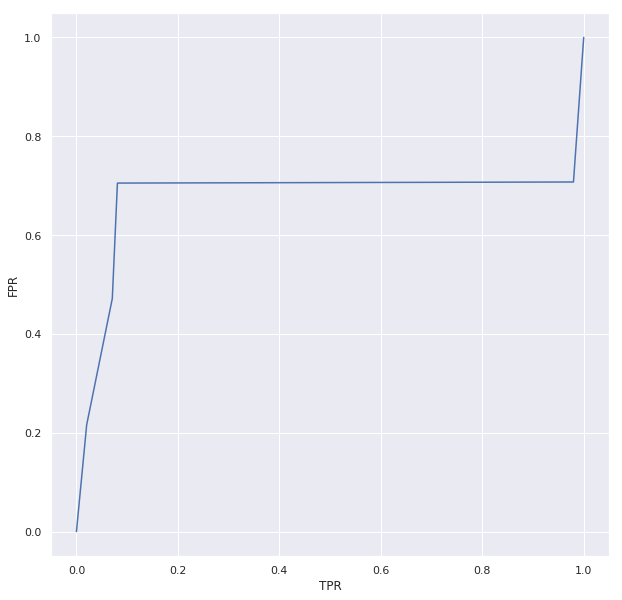

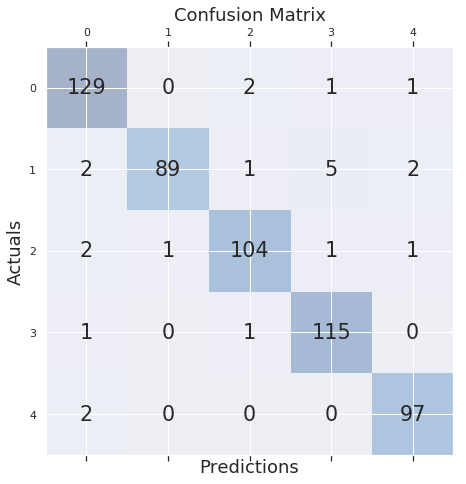

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       133
           1       0.99      0.90      0.94        99
           2       0.96      0.95      0.96       109
           3       0.94      0.98      0.96       117
           4       0.96      0.98      0.97        99

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557

LR, N-Gram Vectors:  0.9587073608617595


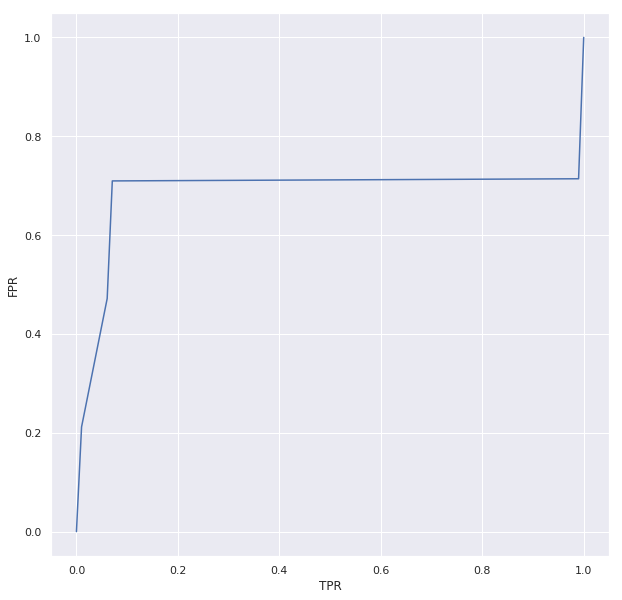

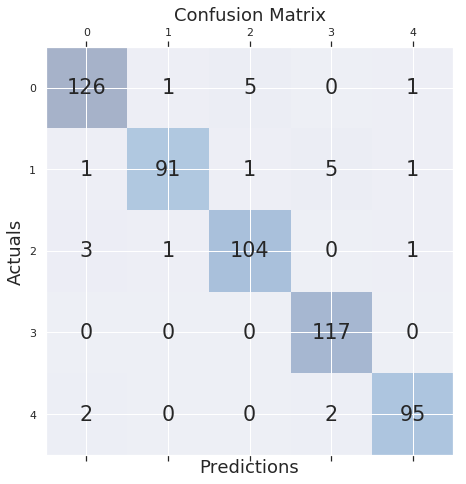

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       133
           1       0.98      0.92      0.95        99
           2       0.95      0.95      0.95       109
           3       0.94      1.00      0.97       117
           4       0.97      0.96      0.96        99

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557

LR, CharLevel Vectors:  0.9569120287253142


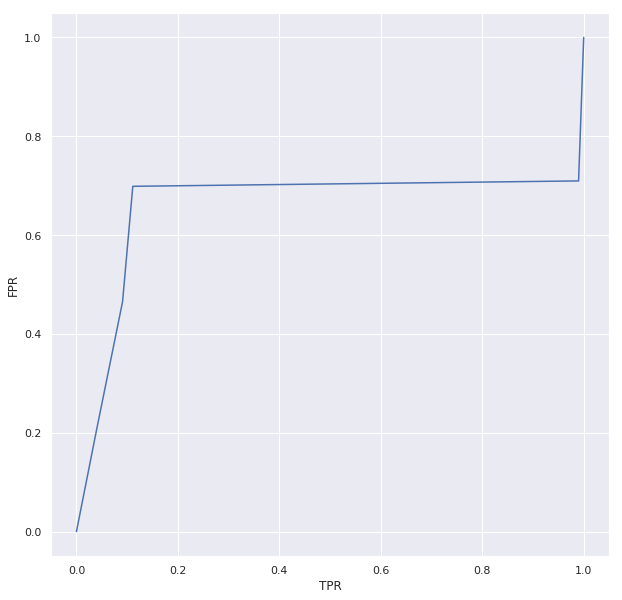

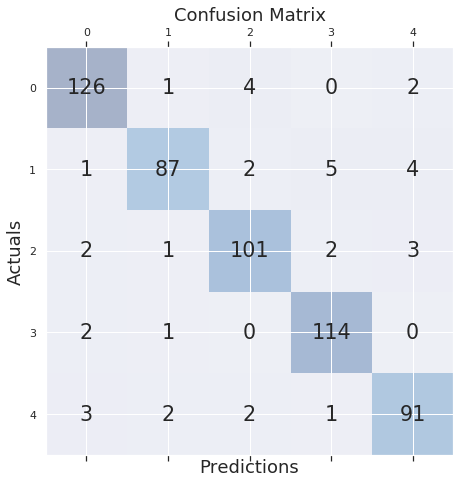

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       133
           1       0.95      0.88      0.91        99
           2       0.93      0.93      0.93       109
           3       0.93      0.97      0.95       117
           4       0.91      0.92      0.91        99

    accuracy                           0.93       557
   macro avg       0.93      0.93      0.93       557
weighted avg       0.93      0.93      0.93       557

LR, Hash Vectors:  0.9317773788150808


In [27]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(solver="lbfgs",multi_class="auto",max_iter=4000), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(solver="lbfgs",multi_class="auto",max_iter=4000), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(solver="lbfgs",multi_class="auto",max_iter=4000), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(solver="lbfgs",multi_class="auto",max_iter=4000), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)

# Linear Classifier on Hash Vectors
accuracy = train_model(linear_model.LogisticRegression(solver="lbfgs",multi_class="auto",max_iter=4000), xtrain_hash_vectorizer, train_y, xvalid_hash_vectorizer)
print("LR, Hash Vectors: ", accuracy)

### RandomForestClassifier

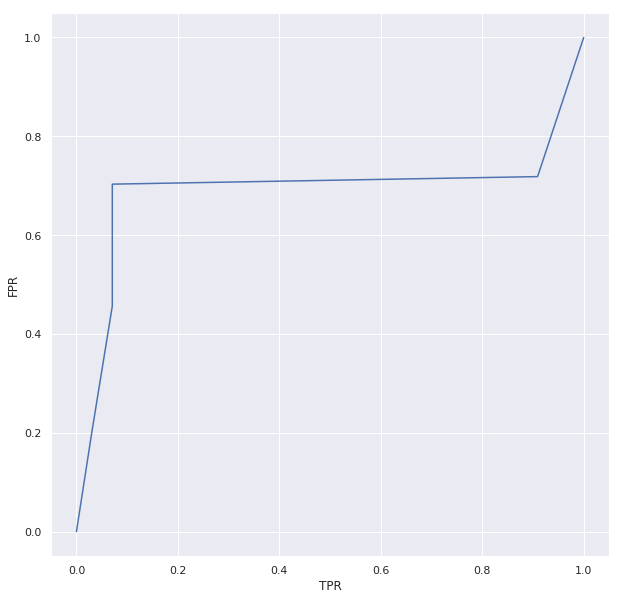

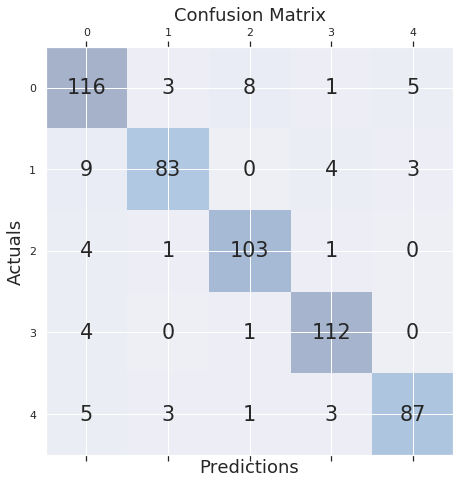

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       133
           1       0.92      0.84      0.88        99
           2       0.91      0.94      0.93       109
           3       0.93      0.96      0.94       117
           4       0.92      0.88      0.90        99

    accuracy                           0.90       557
   macro avg       0.90      0.90      0.90       557
weighted avg       0.90      0.90      0.90       557

RF, Count Vectors:  0.8994614003590664


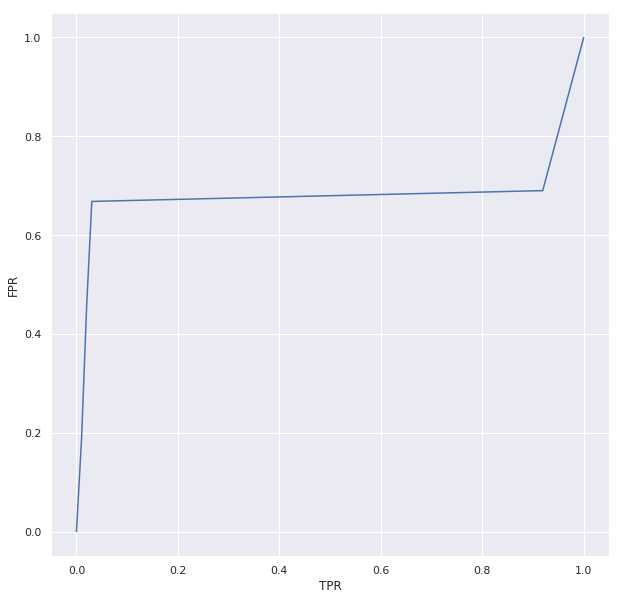

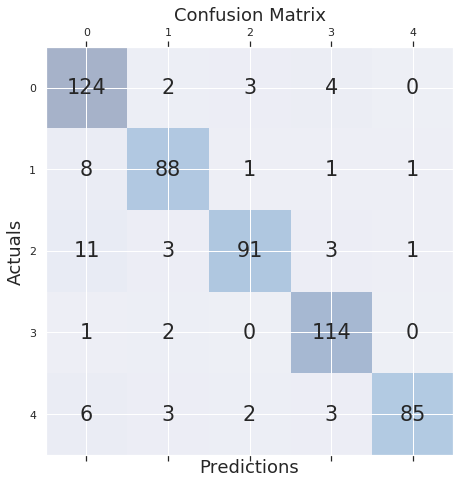

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       133
           1       0.90      0.89      0.89        99
           2       0.94      0.83      0.88       109
           3       0.91      0.97      0.94       117
           4       0.98      0.86      0.91        99

    accuracy                           0.90       557
   macro avg       0.91      0.90      0.90       557
weighted avg       0.91      0.90      0.90       557

RF, WordLevel TF-IDF:  0.9012567324955116


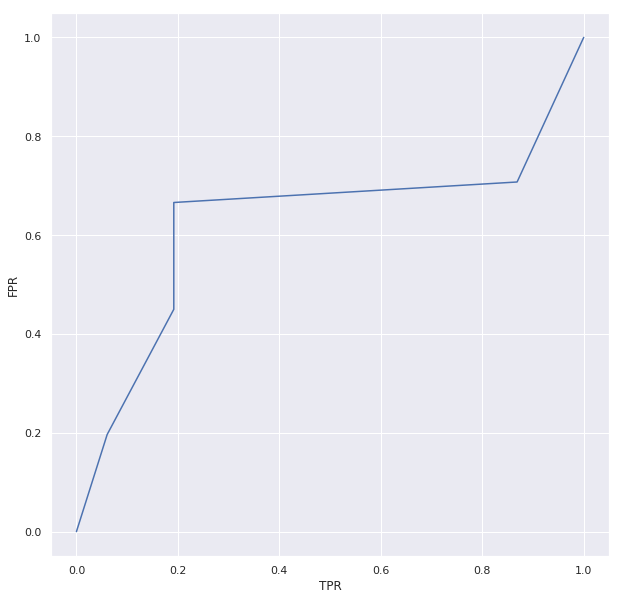

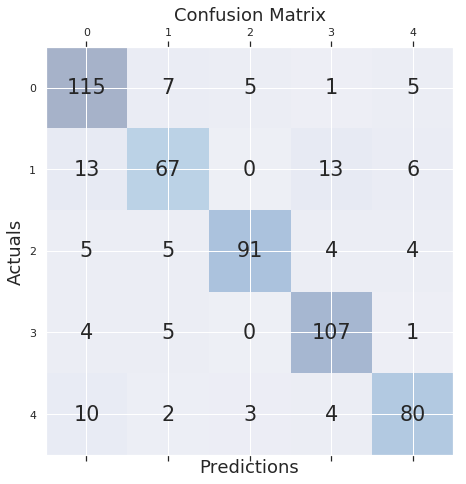

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       133
           1       0.78      0.68      0.72        99
           2       0.92      0.83      0.88       109
           3       0.83      0.91      0.87       117
           4       0.83      0.81      0.82        99

    accuracy                           0.83       557
   macro avg       0.83      0.82      0.82       557
weighted avg       0.83      0.83      0.82       557

RF, N-Gram Vectors:  0.8258527827648114


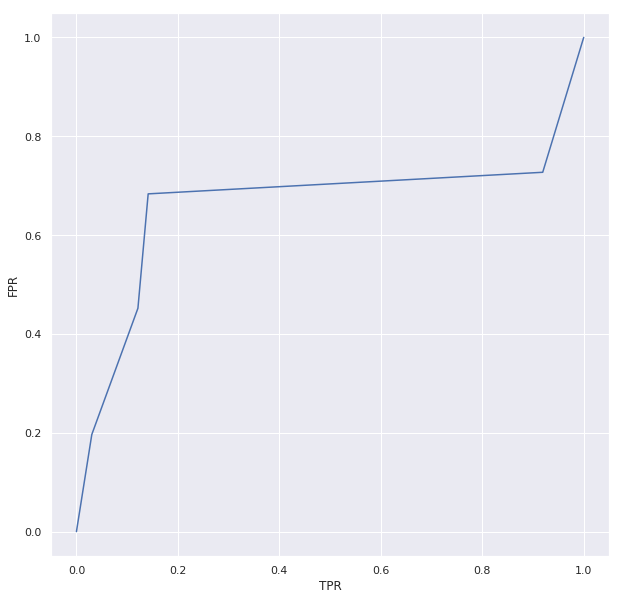

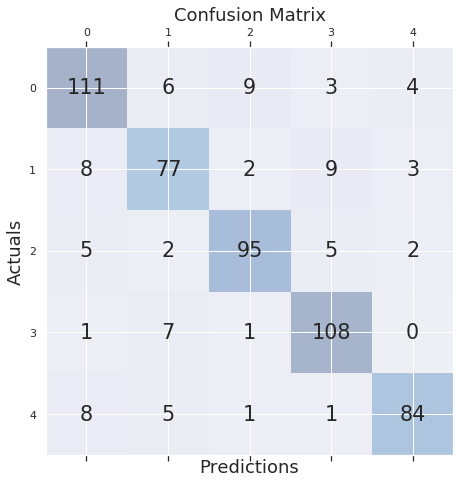

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       133
           1       0.79      0.78      0.79        99
           2       0.88      0.87      0.88       109
           3       0.86      0.92      0.89       117
           4       0.90      0.85      0.88        99

    accuracy                           0.85       557
   macro avg       0.85      0.85      0.85       557
weighted avg       0.85      0.85      0.85       557

RF, CharLevel Vectors:  0.8527827648114902


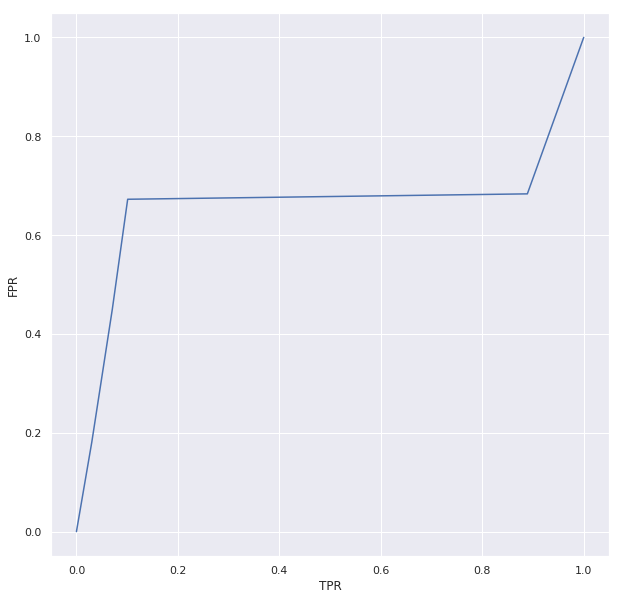

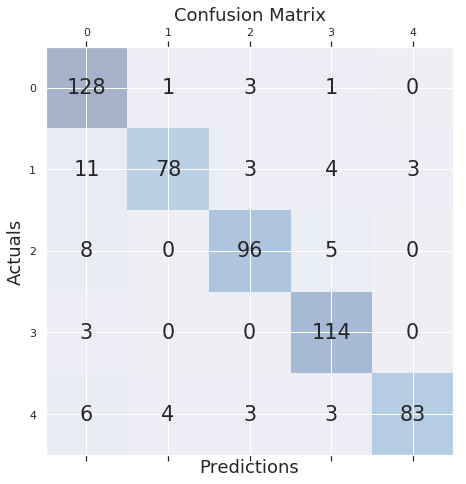

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       133
           1       0.94      0.79      0.86        99
           2       0.91      0.88      0.90       109
           3       0.90      0.97      0.93       117
           4       0.97      0.84      0.90        99

    accuracy                           0.90       557
   macro avg       0.91      0.89      0.89       557
weighted avg       0.90      0.90      0.90       557

RF, Hash Vectors:  0.895870736086176


In [28]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(n_estimators=10), xtrain_count, train_y, xvalid_count)
print("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(n_estimators=10), xtrain_tfidf, train_y, xvalid_tfidf)
print("RF, WordLevel TF-IDF: ", accuracy)

# RF on Ngram Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(n_estimators=10), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("RF, N-Gram Vectors: ", accuracy)

# RF on Character Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(n_estimators=10), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("RF, CharLevel Vectors: ", accuracy)

# RF on Hash Vectors
accuracy = train_model(ensemble.RandomForestClassifier(n_estimators=10), xtrain_hash_vectorizer, train_y, xvalid_hash_vectorizer)
print("RF, Hash Vectors: ", accuracy)

### Extreme Gradient Boosting

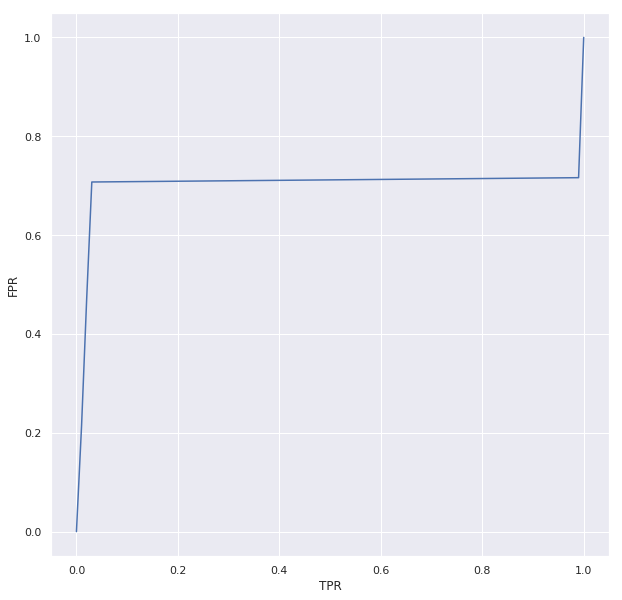

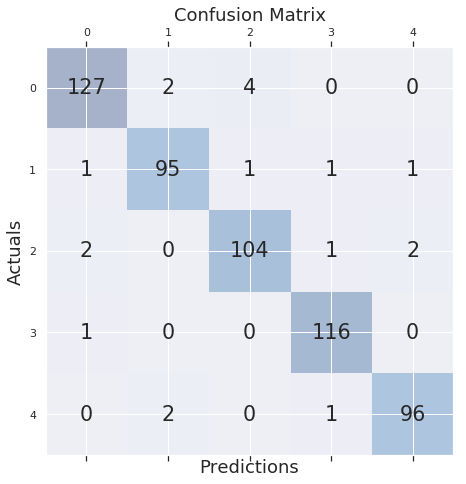

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       133
           1       0.96      0.96      0.96        99
           2       0.95      0.95      0.95       109
           3       0.97      0.99      0.98       117
           4       0.97      0.97      0.97        99

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557

Xgb, Count Vectors:  0.9658886894075404


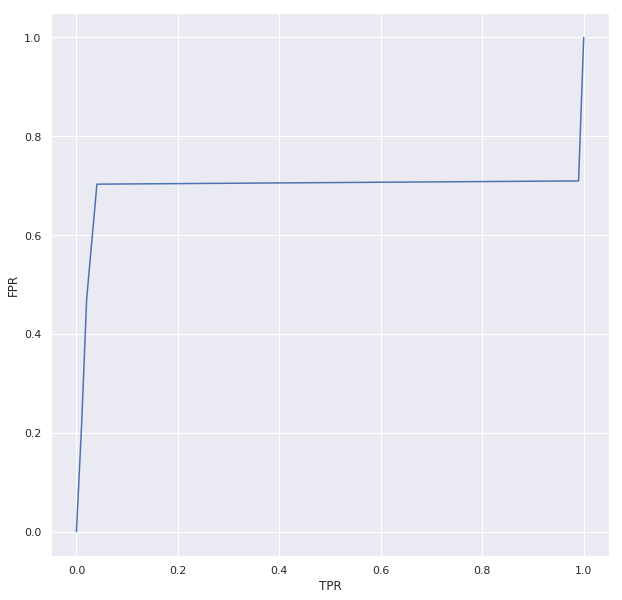

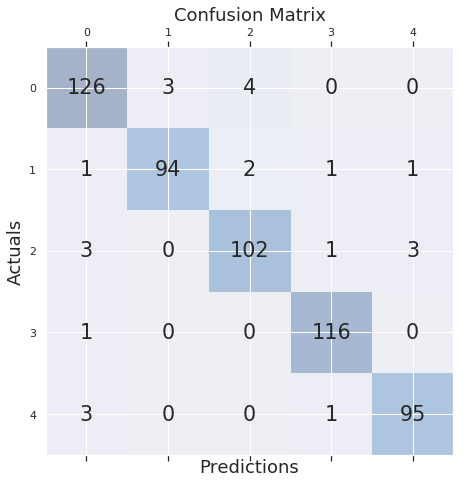

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       133
           1       0.97      0.95      0.96        99
           2       0.94      0.94      0.94       109
           3       0.97      0.99      0.98       117
           4       0.96      0.96      0.96        99

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557

Xgb, WordLevel TF-IDF:  0.9569120287253142


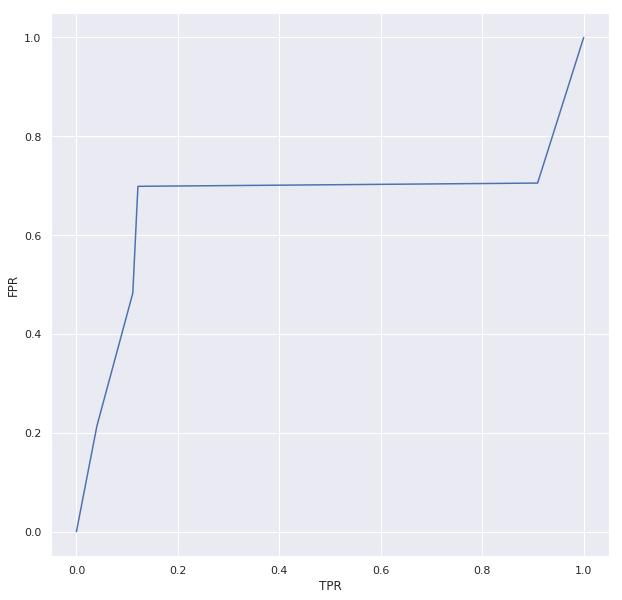

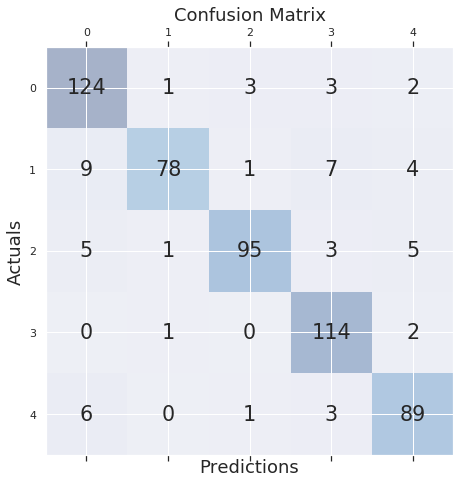

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       133
           1       0.96      0.79      0.87        99
           2       0.95      0.87      0.91       109
           3       0.88      0.97      0.92       117
           4       0.87      0.90      0.89        99

    accuracy                           0.90       557
   macro avg       0.90      0.89      0.90       557
weighted avg       0.90      0.90      0.90       557

Xgb, N-Gram Vectors:  0.8976660682226212


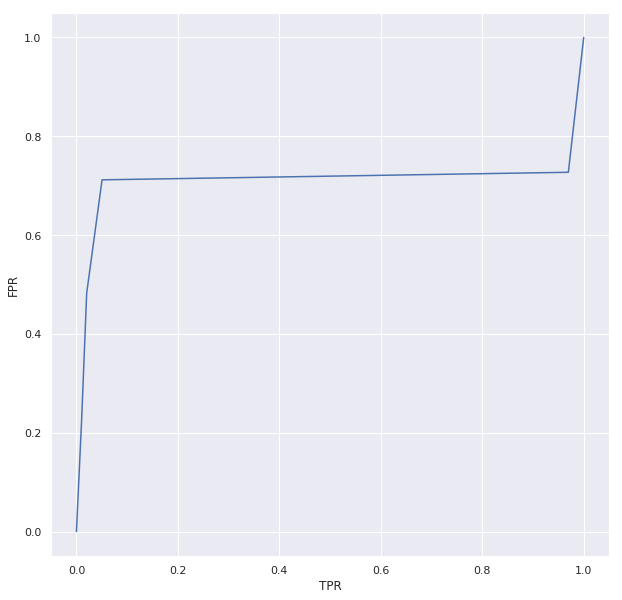

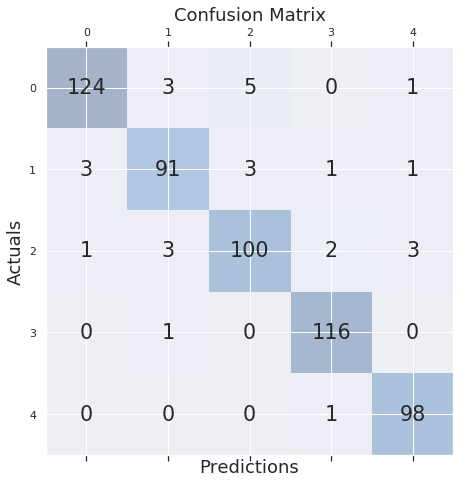

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       133
           1       0.93      0.92      0.92        99
           2       0.93      0.92      0.92       109
           3       0.97      0.99      0.98       117
           4       0.95      0.99      0.97        99

    accuracy                           0.95       557
   macro avg       0.95      0.95      0.95       557
weighted avg       0.95      0.95      0.95       557

Xgb, CharLevel Vectors:  0.9497307001795332


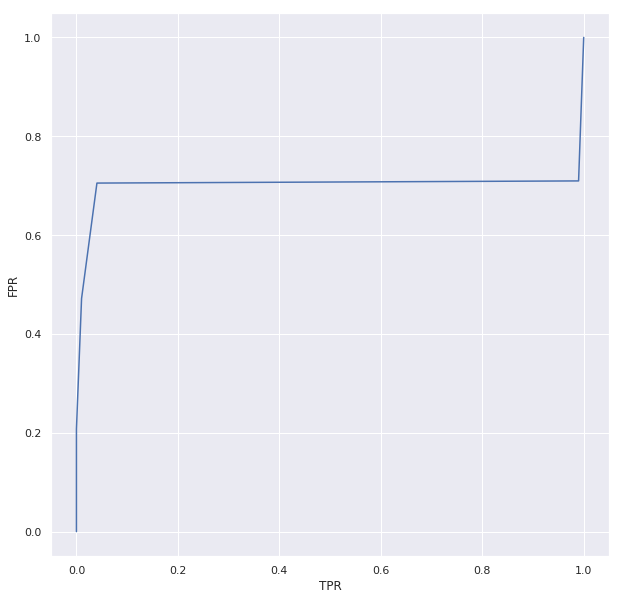

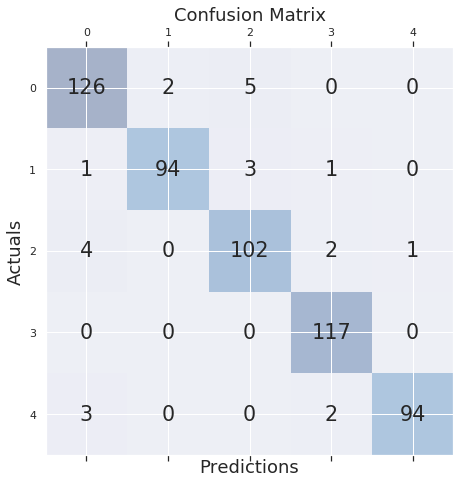

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       133
           1       0.98      0.95      0.96        99
           2       0.93      0.94      0.93       109
           3       0.96      1.00      0.98       117
           4       0.99      0.95      0.97        99

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557

Xgb, Hash Vectors:  0.9569120287253142


In [29]:
# Extreme Gradient Boosting on Count Vector
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print("Xgb, Count Vectors: ", accuracy)

# Extreme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy)

# Extreme Gradient Boosting on Ngram Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("Xgb, N-Gram Vectors: ", accuracy)

# Extreme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print("Xgb, CharLevel Vectors: ", accuracy)

# Extreme Gradient Boosting on Hash Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_hash_vectorizer, train_y, xvalid_hash_vectorizer)
print("Xgb, Hash Vectors: ", accuracy)